# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.



In [1]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

--2024-02-15 03:22:44--  https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K  1.20MB/s    in 0.2s    

2024-02-15 03:22:45 (1.20 MB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



2.Implement a simple k-means algorithm in Python on Colab with the following initialization:

In [2]:
def euclidean_distance(x, y, P=None):
    if P is None:
        return np.sqrt(np.sum((x - y) ** 2, axis=1))
    else:
        diff = x - y
        return np.sqrt(np.diag(diff @ P @ diff.T))

In [3]:
def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):
  centroids = data.T[:, :5].T
  classes = np.random.choice(5, len(data))
  # <YOUR-CODE-HERE>
  for _ in range(num_iterations):
        #calculate euclidean_distance for each point
        distances = np.array([euclidean_distance(data, centroid, P) for centroid in centroids])
        # Assign each data point to the cluster with the nearest centroid

        classes = np.argmin(distances.T, axis=1)
      # Update the centroids to be the mean of all data points currently assigned to their cluster
        for i in range(len(centroids)):
            centroids[i] = np.mean(data[classes == i], axis=0)

  return centroids, classes



3. Scatter the results in two dimensions with different clusters as different colors. You can use matplotlib’s pyplot functionality:

In [4]:
def plot_data(data, centroids, classes):
  # <YOUR-CODE-HERE>
  plt.figure(figsize=(10, 6))
  for i in range(len(centroids)):
      # Plot data points assigned to each centroid
      plt.scatter(data[classes == i, 0], data[classes == i, 1], label=f'Cluster {i}')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
  plt.title('k-Means Clustering')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.show()

  return

<ipython-input-2-a8d6dc9be34a>:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(diff @ P @ diff.T))


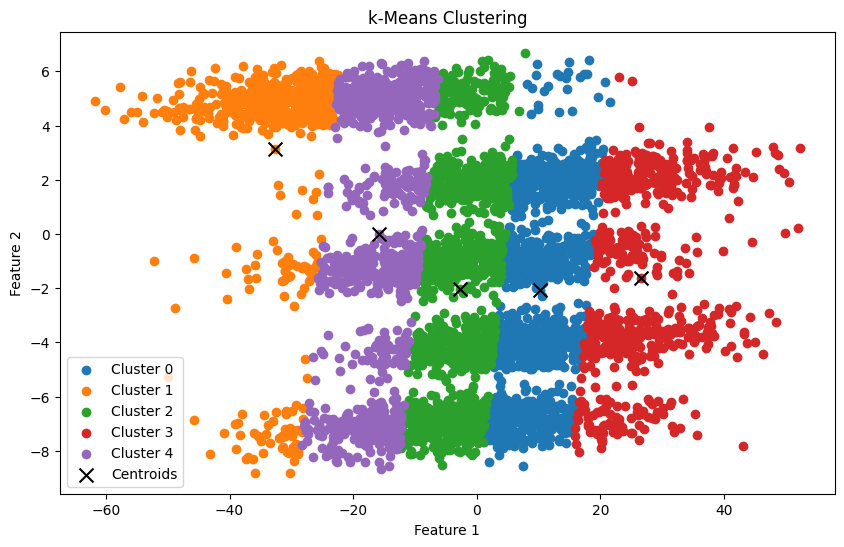

In [5]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)


5.Mahalanobis Distance with K means

In [1]:

def mahalanobis_distance(x, y, P_inv):
    diff = x - y
    # Calculate the Mahalanobis distance using the difference vector, the inverse of P^T * P

    return np.sqrt(np.dot(np.dot(diff.T, P_inv), diff))

In [7]:
def kmeans_cluster(data, centroids, P, num_iterations=100):
    # Precompute the inverse of (P^T P)
    P_inv = np.linalg.inv(np.dot(P.T, P))

    for _ in range(num_iterations):
        # Calculate Mahalanobis distances to centroids
        distances = np.array([[mahalanobis_distance(x, centroid, P_inv) for centroid in centroids] for x in data])

        # Assign data points to the nearest centroid
        classes = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(len(centroids)):
            centroids[i] = np.mean(data[classes == i], axis=0) if len(data[classes == i]) > 0 else centroids[i]

    return centroids, classes

def plot_data(data, centroids, classes):
    plt.figure(figsize=(10, 6))
    for i in range(len(centroids)):
        # Plot data points assigned to each centroid
        plt.scatter(data[classes == i, 0], data[classes == i, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.title('k-Means Clustering with Mahalanobis Distance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [8]:
use_P = True
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])
P_ = np.array([[10, 0.5], [-10, 0.25]]) if use_P else np.eye(2)


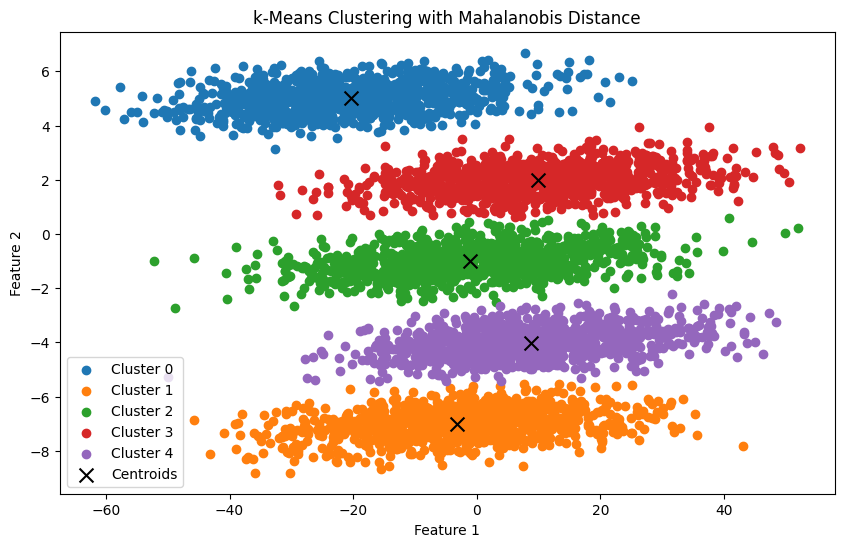

In [9]:
centroids_, classes_ = kmeans_cluster(all_data, centroids_, P_, num_iterations=100)
plot_data(all_data, centroids_, classes_)

6. Calculate and print out the first principle component of the aggregate data.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'all_data' is your dataset containing the aggregate data
# Standardize the aggregate data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

# Apply PCA to the aggregate data
pca = PCA(n_components=1)
pca.fit(scaled_data)

# The first principal component
first_principal_component = pca.components_[0]
print("First Principal Component - Aggregate Data:", first_principal_component)


First Principal Component - Aggregate Data: [-0.70710678  0.70710678]


In [11]:
# Calculate and print the first principal component for each cluster
for i in range(len(centroids_)):
    cluster_data = all_data[classes_ == i]
    scaled_cluster_data = scaler.fit_transform(cluster_data)
    pca.fit(scaled_cluster_data)
    first_principal_component_cluster = pca.components_[0]
    print(f"First Principal Component - Cluster {i}:", first_principal_component_cluster)


First Principal Component - Cluster 0: [0.70710678 0.70710678]
First Principal Component - Cluster 1: [-0.70710678 -0.70710678]
First Principal Component - Cluster 2: [-0.70710678 -0.70710678]
First Principal Component - Cluster 3: [0.70710678 0.70710678]
First Principal Component - Cluster 4: [-0.70710678 -0.70710678]
